Exercises
Within your codeup-data-science directory, create a new directory named classification-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub. Make sure to add a .gitignore file. In your .gitignore, ignore .DS_Store, .ipynb_checkpoints/, __pycache__, titanic.csv, iris.csv, and env.py. Add and commit your .gitignore file before moving forward.

The end product of this exercise is a jupyter notebook (classification_exercises.ipynb) and acquire.py. The notebook will contain all your work as you move through the exercises. The acquire.py file should contain the final functions.



In [103]:
# imports

import pandas as pd
import numpy as np
import os
from scipy import stats

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

import acquire
import prepare

1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
# Create sql query and save to variable.

sql_query = 'SELECT * FROM measurements'

In [ ]:
# Create connection url and save to a variable.

connection_url = f'mysql+pymysql://{user}:{password}@{host}/iris_db'

In [ ]:

# Use my variables in the pandas read_sql() function.

df_iris = pd.read_sql(sql_query, connection_url)
df_iris.head(3)

1a. print the first 3 rows


In [ ]:
df_iris.head(3)

1b. print the number of rows and columns (shape)

In [ ]:
df_iris.shape

1c. print the column names

In [ ]:
df_iris.columns

1d. print the data type of each column

In [ ]:
df_iris.info()

1e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

In [ ]:
# I would recommend rounding down to 4 decimal places to make it easier to read / manipulate

2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
# getting this set up

df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')
df_excel.head(3)

2a. assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
# checking my work...
df_excel_sample.shape

2b. print the number of rows of your original dataframe

In [ ]:
df_excel.info()

2c. print the first 5 column names

In [ ]:
df_excel.columns[:5]

2d. print the column names that have a data type of object


In [ ]:
df_excel.select_dtypes(['object']).columns

In [ ]:
# what if I wanted multiple dtypes...
df_excel.select_dtypes(include=['object', 'bool']).columns

2e. compute the range for each of the numeric variables.


In [ ]:
# give me a list of numeric columns
df_excel.select_dtypes(exclude=['object']).columns

In [ ]:
df_excel.select_dtypes(exclude='object').max() - df_excel.select_dtypes(exclude='object').min()

3. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing'

In [ ]:
csv_export_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv&gid=341089357')


In [ ]:
df_google = pd.read_csv(csv_export_url)
df_google.head(2)

3a. print the first 3 rows

In [ ]:
df_google.head(3)

3b. print the number of rows and columns

In [ ]:
df_google.shape

3c. print the column names

In [ ]:
df_google.columns

3d. print the data type of each column

In [ ]:
df_google.info()

3e. print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

3f. print the unique values for each of your categorical variables

In [ ]:
df_google.nunique()

In [ ]:
# how to get number of unique entries per column/Series
df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']).nunique()

In [ ]:
df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])


In [ ]:
cats_only_df = df_google.filter(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])
cats_only_df.head()

In [ ]:
# Survived unique values...
cats_only_df['Survived'].unique()

In [ ]:
# Pclass unique values
cats_only_df['Pclass'].unique()

In [ ]:
# Sex unique values
cats_only_df['Sex'].unique()

In [ ]:
# SibSp unique values
cats_only_df['SibSp'].unique()

In [ ]:
# Parch unique values
cats_only_df['Parch'].unique()

In [ ]:
# Embarked unique values
cats_only_df['Embarked'].unique()

Make a new python module, acquire.py to hold the following data aquisition functions:

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [ ]:
df_titanic = acquire.new_titanic_data()
df_titanic.head()

2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
df_iris = acquire.new_iris_data()
df_iris.head()

3. Once you've got your get_titanic_data and get_iris_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for a local filename like titanic.csv or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [ ]:
df_titanic_csv = acquire.get_titanic_data()
df_titanic_csv.head(2)

## Prepare Exercises

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [ ]:
# done above for previous exercises...
df_iris.head(2)

2. Drop the species_id and measurement_id columns.

In [ ]:
# make a list of columns to drop

columns_to_drop = ['species_id', 'measurement_id']

In [ ]:
# create a new df to check work (won't alter original df)

df_iris_clean = df_iris.drop(columns=columns_to_drop)
df_iris_clean.head(2)

3. Rename the species_name column to just species.

In [ ]:
df_iris_clean = df_iris_clean.rename(columns={'species_name': 'species'})
df_iris_clean.head(2)

4. Create dummy variables of the species name.

In [ ]:
dummy_df = pd.get_dummies(df_iris_clean[['species']], dummy_na=False, drop_first=True)
dummy_df.head(2)

In [ ]:
df_iris_clean = pd.concat([df_iris_clean, dummy_df], axis=1)
df_iris_clean

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    '''
    This function will acquire the iris_db from Codeup and 
    prepare the data to be split for train / validate / test
    '''
#     drop species_id and measurement columns
    df = df.drop(columns=(['species_id', 'measurement_id']))
# Rename the species_name column to just species.
    df = df.rename(columns={'species_name': 'species'})
#     Create dummy variables of the species name.
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=True)
# let's put it all together...
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [ ]:
please_sweet_baby_jesus = prep_iris(df_iris)
please_sweet_baby_jesus

In [ ]:
all_iris = acquire.get_iris_data()
all_iris.head()

In [ ]:
test = prep_iris(all_iris)
test

Exercises
Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [2]:
# acquire iris data

iris_df = acquire.get_iris_data()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [3]:
# prep the data

iris_prep_df = prepare.prep_iris(iris_df)
iris_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species             150 non-null    object 
 5   species_versicolor  150 non-null    uint8  
 6   species_virginica   150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 7.3+ KB


In [4]:
# split the data

iris_train, iris_validate, iris_test = prepare.iris_split(iris_prep_df)

In [5]:
# what do they look like?
# training df
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 87 to 44
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [6]:
# validate df
iris_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 70 to 120
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        36 non-null     float64
 1   sepal_width         36 non-null     float64
 2   petal_length        36 non-null     float64
 3   petal_width         36 non-null     float64
 4   species             36 non-null     object 
 5   species_versicolor  36 non-null     uint8  
 6   species_virginica   36 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 1.8+ KB


In [7]:
# test df
iris_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 147 to 51
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        30 non-null     float64
 1   sepal_width         30 non-null     float64
 2   petal_length        30 non-null     float64
 3   petal_width         30 non-null     float64
 4   species             30 non-null     object 
 5   species_versicolor  30 non-null     uint8  
 6   species_virginica   30 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 1.5+ KB


2. Univariate Stats

2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
# what are the quantitative and categorical variables?

iris_cat_vars = ['species', 'species_versicolor', 'species_virginica']
iris_quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [140]:
# species hist




In [141]:
# species bar



2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [ ]:
# iris_quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

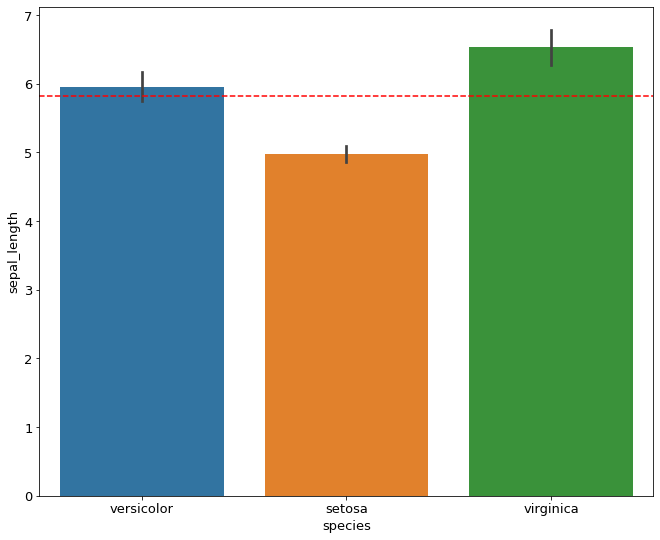

In [135]:
# sepal length
mean=iris_train['sepal_length'].mean()
tsl = sns.barplot(data = iris_train, y = 'sepal_length', x ='species' )
tsl.axhline(mean, color='r', linestyle='--')

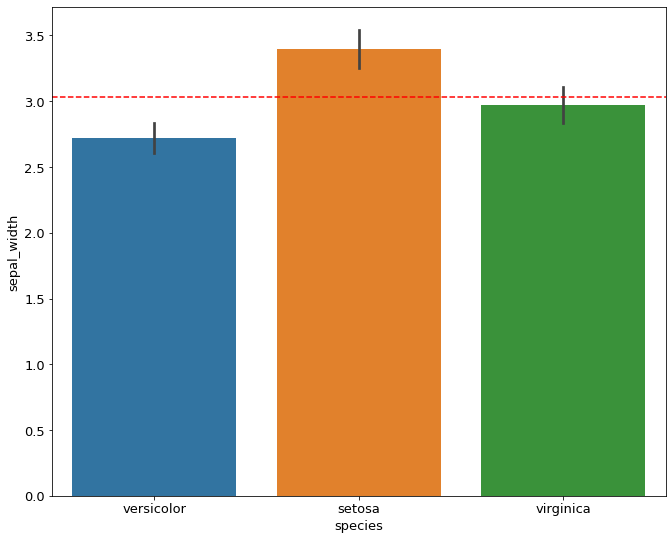

In [136]:
# sepal width
mean=iris_train['sepal_width'].mean()
tsw = sns.barplot(data = iris_train, y = 'sepal_width', x ='species' )
tsw.axhline(mean, color='r', linestyle='--')

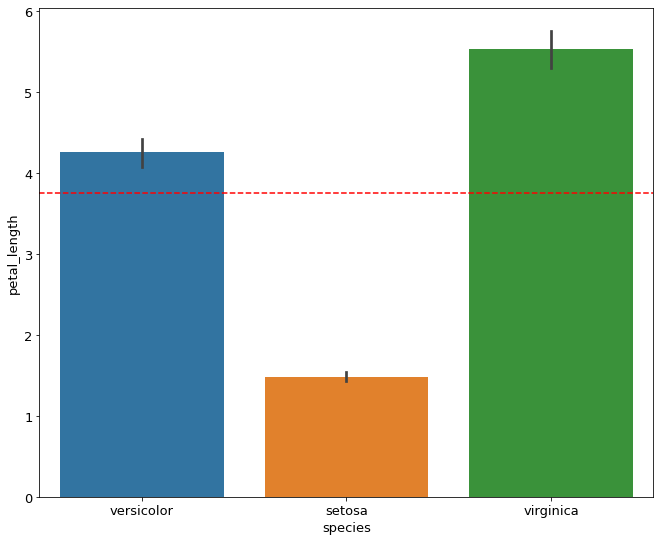

In [137]:
# petal length
mean=iris_train['petal_length'].mean()
tpl = sns.barplot(data = iris_train, y = 'petal_length', x ='species' )
tpl.axhline(mean, color='r', linestyle='--')

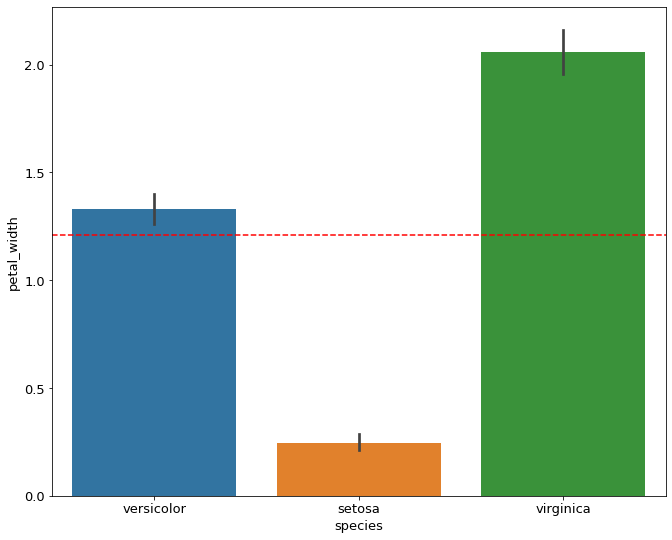

In [139]:
# petal width
mean=iris_train['petal_width'].mean()
tpw = sns.barplot(data = iris_train, y = 'petal_width', x ='species' )
tpw.axhline(mean, color='r', linestyle='--')

2c. Document takeaways & any actions.

3. Bivariate Stats

3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

3b. For each measurement type, compute the descriptive statistics for each species.



3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

3d. Document takeaways & any actions.



4. Multivariate Stats

4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

4b. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

4c. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



4d. Document takeaways and any actions.

In [9]:
# here are the questions from Madeleine's Lesson

Exercises
Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.



In [10]:
# look at the steps from the curriculum exercises
# iris_train
# iris_validate
# iris_test

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [11]:
# make sure to only explore data in the iris_train df.
# what does it look like?

iris_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
87,6.3,2.3,4.4,1.3,versicolor,1,0
32,5.2,4.1,1.5,0.1,setosa,0,0
142,5.8,2.7,5.1,1.9,virginica,0,1
31,5.4,3.4,1.5,0.4,setosa,0,0
42,4.4,3.2,1.3,0.2,setosa,0,0


In [13]:
# melt it like a grilled cheese

iris_train_num_melt = iris_train[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].melt(id_vars = ['species'],
                         var_name = 'measurement',
                         value_name = 'value')
iris_train_num_melt

,species,measurement,value
0,versicolor,sepal_length,6.3
1,setosa,sepal_length,5.2
2,virginica,sepal_length,5.8
3,setosa,sepal_length,5.4
4,setosa,sepal_length,4.4
...,...,...,...
331,versicolor,petal_width,1.4
332,versicolor,petal_width,1.7
333,virginica,petal_width,2.0
334,setosa,petal_width,0.1


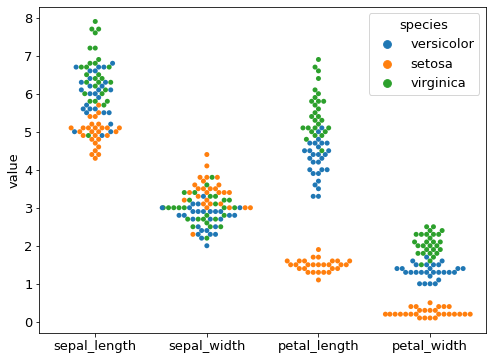

In [17]:
# swarm of bees

plt.figure(figsize=(8,6))
p = sns.swarmplot(
    x='measurement',
    y='value',
    hue='species',
    data=iris_train_num_melt,
)
p.set(xlabel='')
plt.show()

In [ ]:
# what does it mean?

# sepal length might have some value, when used in conjunction with another, more segregated stat
# sepal lenth doesn't have enough stratification to be useful on its own


# sepal width is very congregated, and has little to no value

# petal length is great for identifying setosa, and should be useful in helping to ID versicolor and virginica

# petal width is also great for identifying setosa, and very useful in identifying versicolor and virginica



3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length



In [40]:
# new columns for area...

iris_train['sepal_area'] = iris_train['sepal_length'] * iris_train['sepal_width']
iris_train['petal_area'] = iris_train['petal_length'] * iris_train['petal_length']

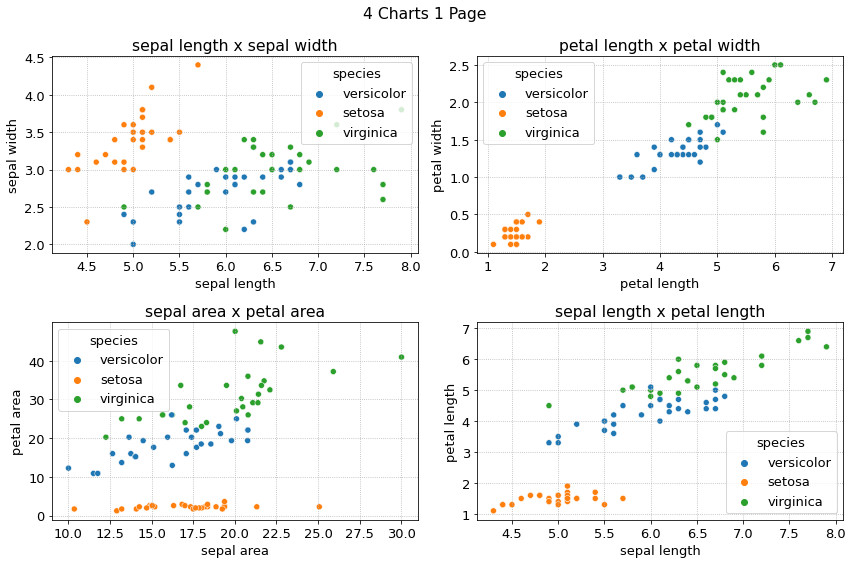

In [47]:
# initial formatting
plt.figure(figsize=(12,8))
plt.suptitle('4 Charts 1 Page')
# sepal_length x sepal_width
x1 = iris_train['sepal_length']
y1 = iris_train['sepal_width']
# petal_length x petal_width
x2 = iris_train['petal_length']
y2 = iris_train['petal_width']
# sepal_area x petal_area
x3 = (iris_train['sepal_length'] * iris_train['sepal_width'])
y3 = (iris_train['petal_length'] * iris_train['petal_width'])
# sepal_length x petal_length
x4 = iris_train['sepal_length']
y4 = iris_train['petal_length']

# other stuff I need

species = iris_train['species']


# sepal_length x sepal_width
plt.subplot(2,2,1)
plt.title('sepal length x sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_train)

# petal_length x petal_width
plt.subplot(2,2,2)
plt.title('petal length x petal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True, ls = ':')
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_train)

# sepal_area x petal_area
plt.subplot(2,2,3)
plt.title('sepal area x petal area')
plt.xlabel('sepal area')
plt.ylabel('petal area')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_area', y='petal_area', hue='species', data=iris_train)

# sepal_length x petal_length
plt.subplot(2,2,4)
plt.title('sepal length x petal length')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.grid(True, ls = ':')
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_train)

# more formatting / let's see it
plt.tight_layout()
plt.show()

What are your takeaways?

In [ ]:
# cannot add hue to subplot scatterplots in matplotlib
# make sure to use axis-levl (not figure-level) plots in Seaborn
# Need to find a way to do this more efficiently...
# setosa is quite unique from versicolor and virginica
# all charts can be used to detect setosa vs not setosa
# charts 2,3,4 can be used to detect all three species, 
# chart 1 has too much overlap to be useful for detecting virginia or versicolor

4. Create a heatmap of each variable layering correlation coefficient on top.

In [74]:
iris_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_versicolor', 'species_virginica', 'sepal_area', 'petal_area'],
      dtype='object')

<AxesSubplot:>

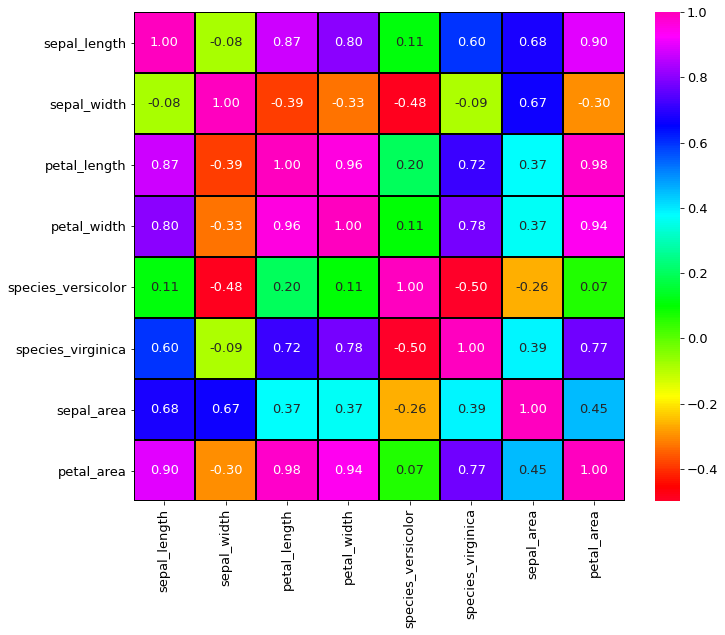

In [72]:
# what are we measuring???

sns.heatmap(iris_train.corr(), cmap='gist_rainbow', linewidth= 1, linecolor= 'k', annot= True, fmt='.2f', )

5. Create a scatter matrix visualizing the interaction of each variable.

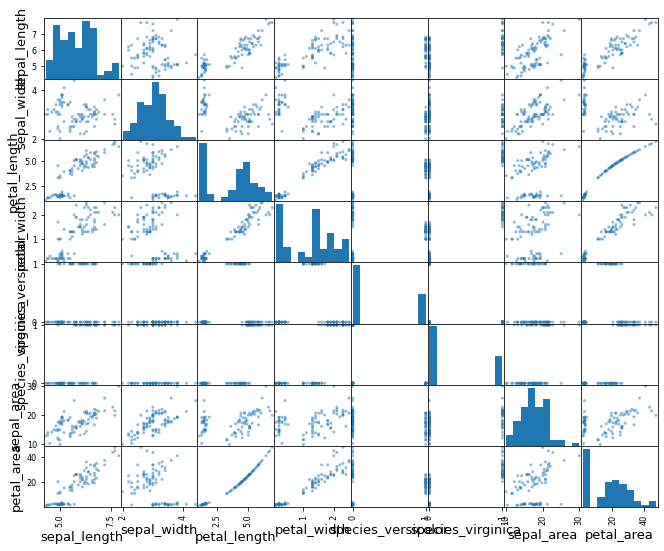

In [97]:
iris_scatter_matrix = pd.plotting.scatter_matrix(iris_train)

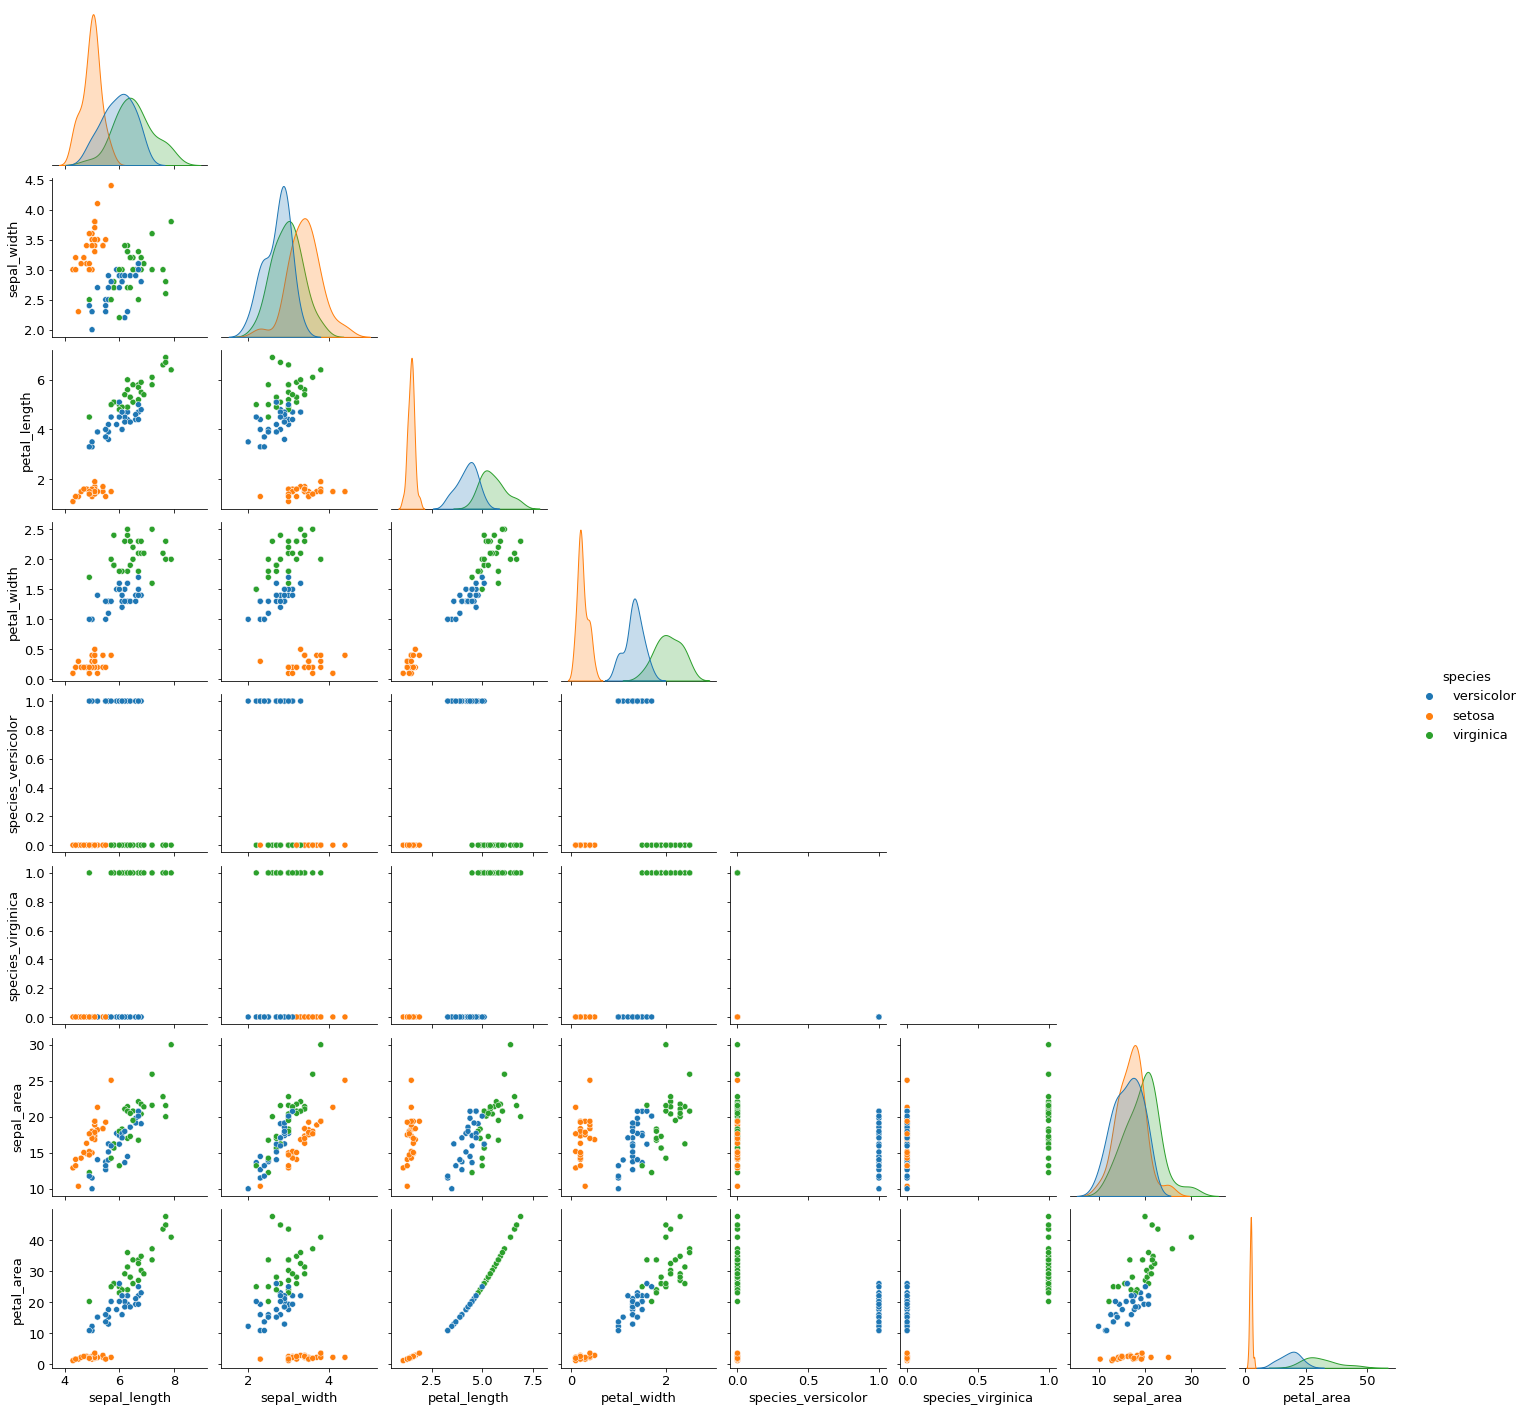

In [95]:
# pair plots for life

sns.pairplot(iris_train, hue='species', corner=True)

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- $H_{0}$: There is no difference between sepal length between virginica and versicolor
- $H_{0}$: There is a difference in sepal length between virginica and versicolor

In [99]:
alpha = 0.05
# 2 sample, 2 tailed ttest

In [101]:
sl_virginica = iris_train['sepal_length'][iris_train['species']=='virginica']
sl_versicolor = iris_train['sepal_length'][iris_train['species']=='versicolor']

In [105]:
t, p = stats.ttest_ind(sl_virginica, sl_versicolor, equal_var = True)

t, p, alpha

(3.4152403731889365, 0.0012167310933963353, 0.05)

In [106]:
t, p = stats.ttest_ind(sl_virginica, sl_versicolor, equal_var = False)

t, p, alpha

(3.4152403731889365, 0.0012491301040389266, 0.05)

In [107]:
if (p < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


6a. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

6b. What is your takeaway from this statistical testing?

In [109]:
# Much stronger difference in sepal length between virginica and versicolor than was apparent 
# in initial vizualisations

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [119]:
sa = iris_train['sepal_area'][iris_train['species']!='setosa']
pa = iris_train['petal_area'][iris_train['species']!='setosa']
vs = iris_train['species'][iris_train['species']!='setosa']

<AxesSubplot:xlabel='sepal_area', ylabel='species'>

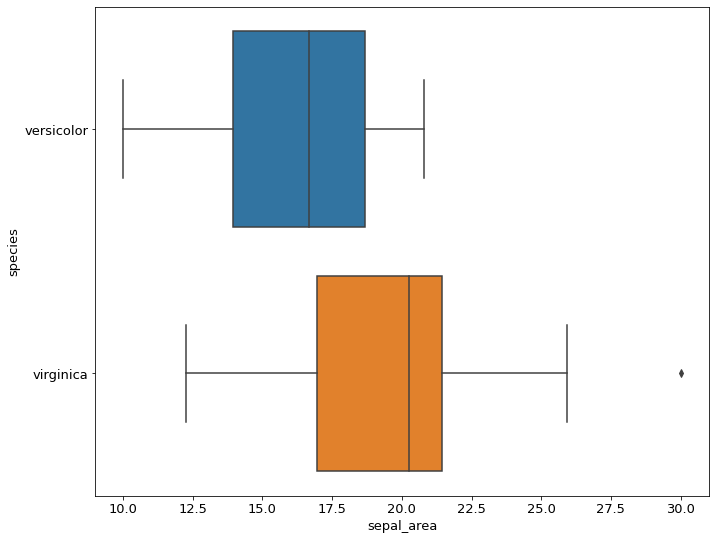

In [122]:
sns.boxplot(data=iris_train, y=vs, x=sa)

<AxesSubplot:xlabel='species', ylabel='petal_area'>

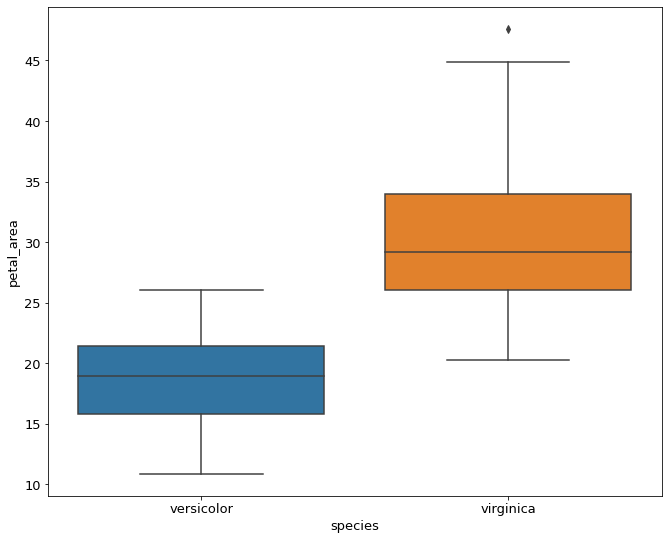

In [121]:
sns.boxplot(data=iris_train, x=vs, y=pa)